In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zahidmughal2343_global_cancer_patients_2015_2024_path = kagglehub.dataset_download('zahidmughal2343/global-cancer-patients-2015-2024')

print('Data source import complete.')

Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cancer-patients-2015-2024/global_cancer_patients_2015_2024.csv


In [ ]:
df = pd.read_csv('/kaggle/input/global-cancer-patients-2015-2024/global_cancer_patients_2015_2024.csv')

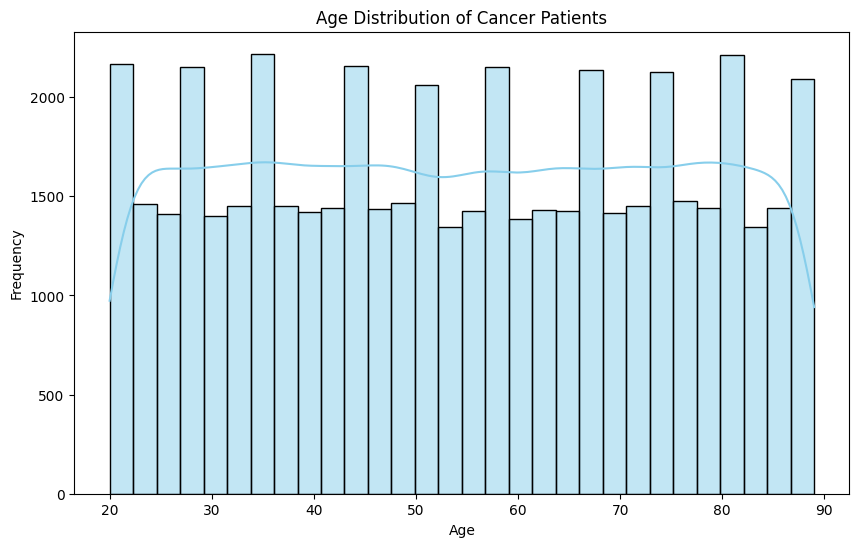

In [ ]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

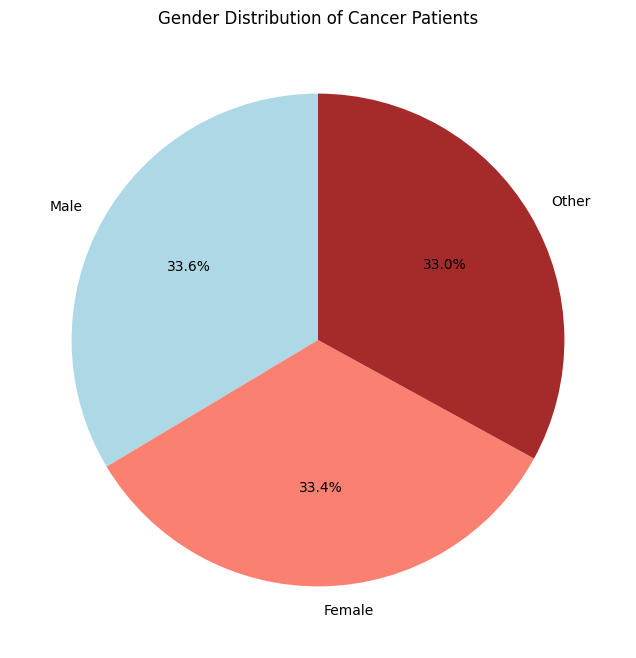

In [ ]:
#pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
gender_counts.plot.pie(autopct='%1.1f%%',colors=['lightblue','salmon','brown'], startangle=90)
plt.ylabel('')
plt.title('Gender Distribution of Cancer Patients')
plt.show()

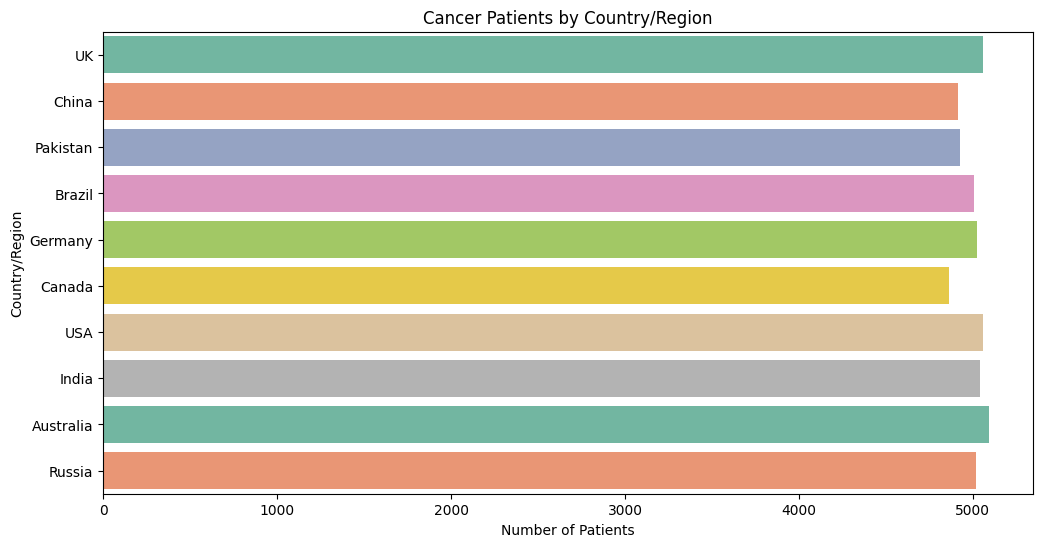

In [ ]:
#Bar plot for Country/Region distribution
plt.figure(figsize=(12,6))
sns.countplot(y='Country_Region', data=df, palette='Set2')
plt.title('Cancer Patients by Country/Region')
plt.xlabel('Number of Patients')
plt.ylabel('Country/Region')
plt.show()

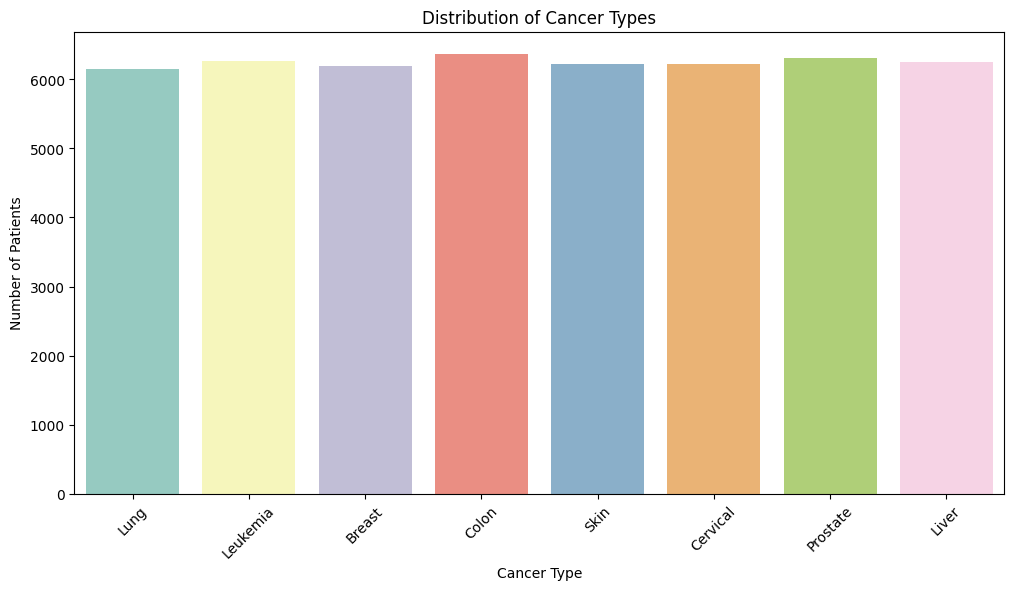

In [ ]:
#Bar plot for cancer Type dsitribution
plt.figure(figsize=(12,6))
sns.countplot(x='Cancer_Type', data=df, palette='Set3')
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

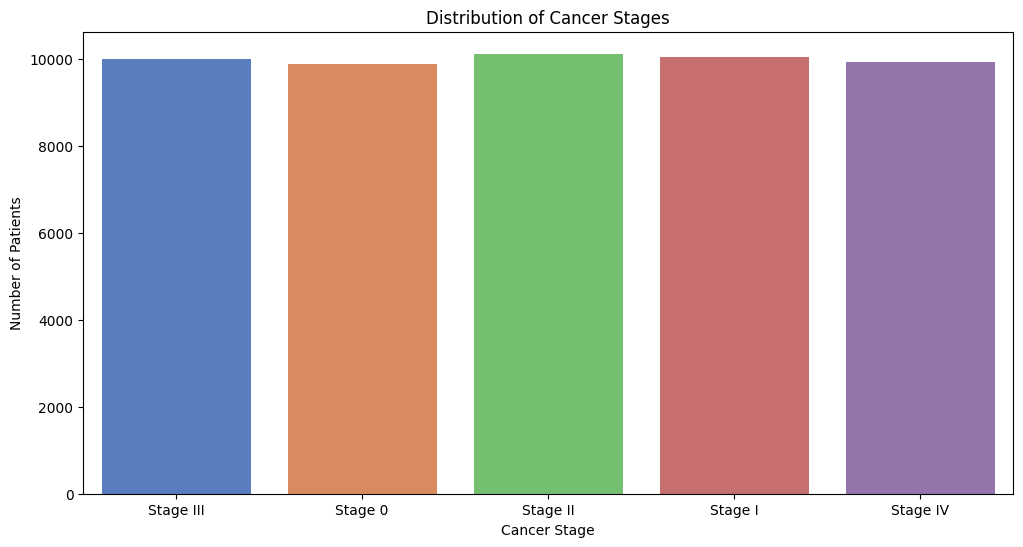

In [ ]:
#Bar plot for Cancer Stage distirbution
plt.figure(figsize=(12,6))
sns.countplot(x='Cancer_Stage', data=df, palette='muted')
plt.title('Distribution of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()

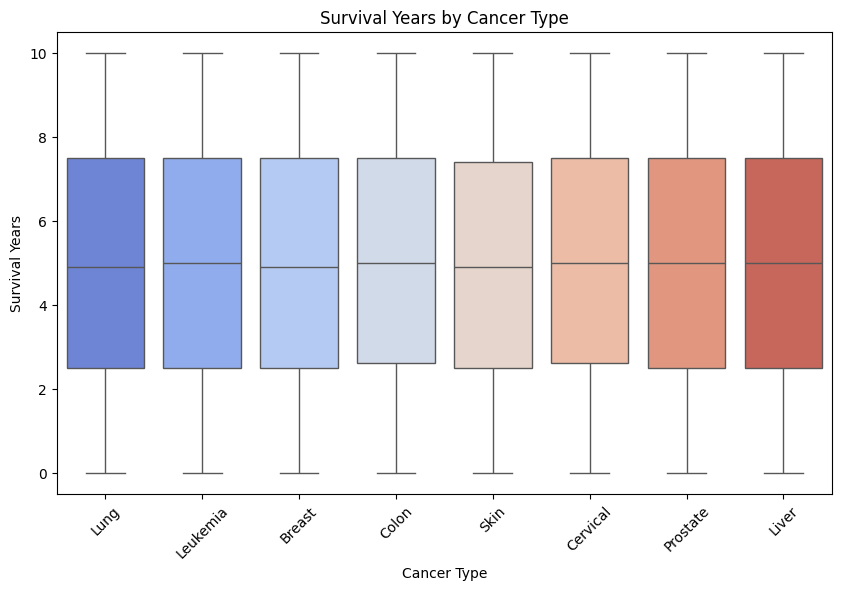

In [ ]:
#Boxplot for Sruvival Years
plt.figure(figsize=(10,6))
sns.boxplot(x='Cancer_Type',y= 'Survival_Years', data=df, palette='coolwarm')
plt.title('Survival Years by Cancer Type')
plt.ylabel('Survival Years')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
plt.show()

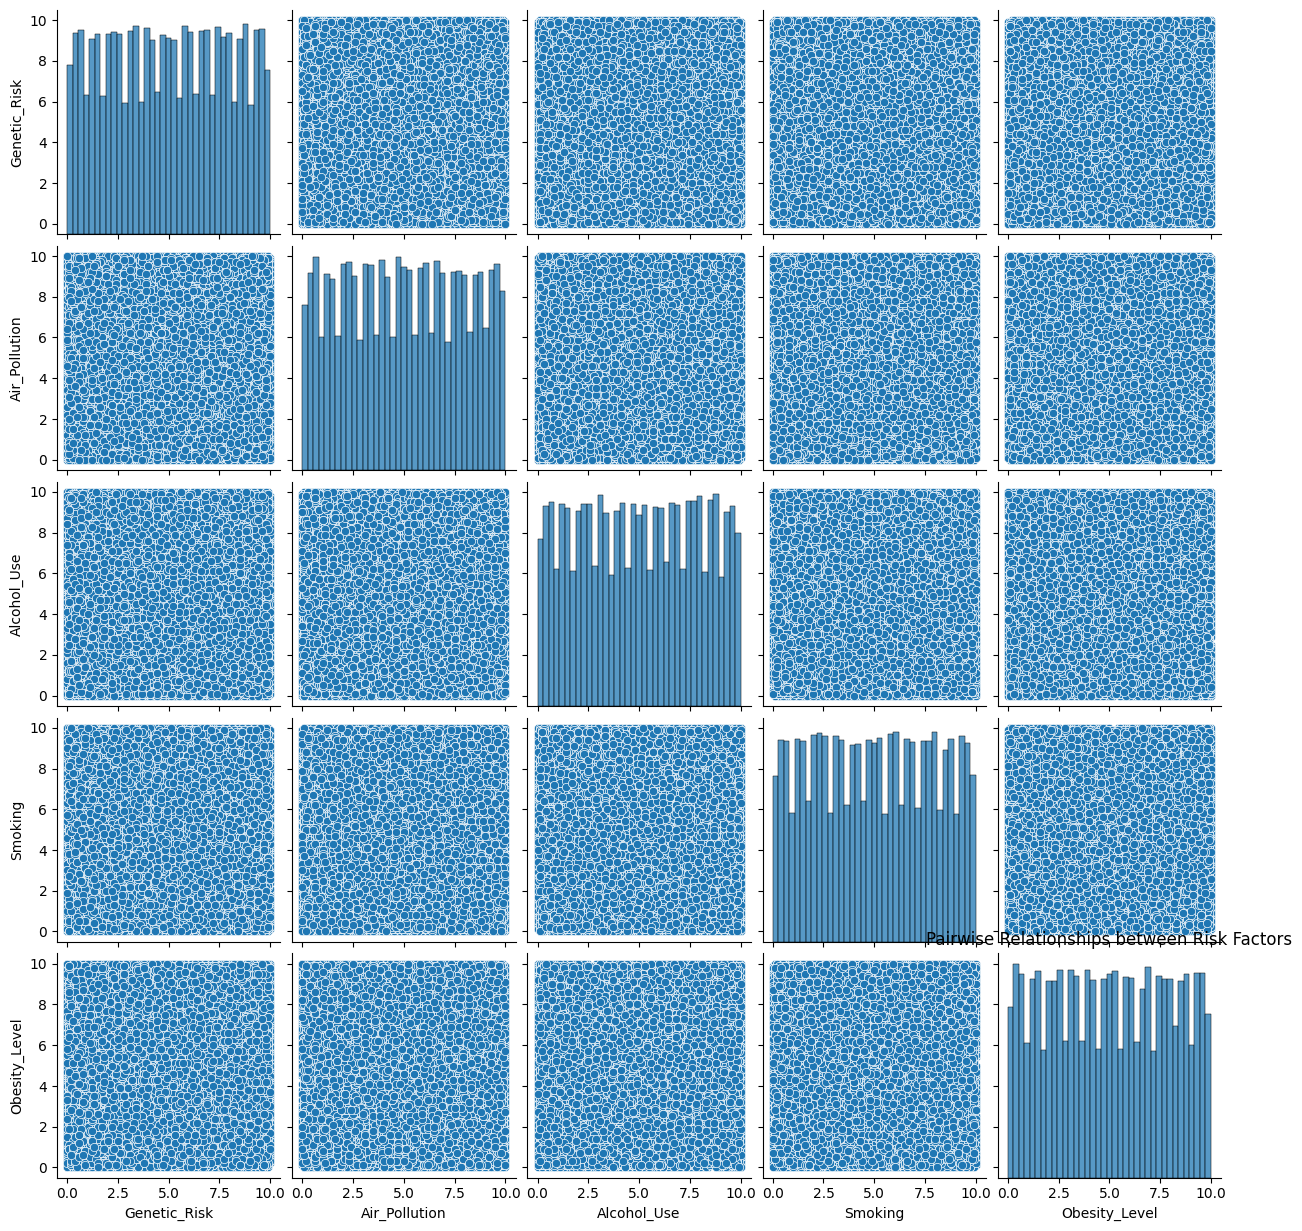

In [ ]:
# Pairplot to visualize relationships between genetic risk and other factors
sns.pairplot(df[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']])
plt.title('Pairwise Relationships between Risk Factors')
plt.show()

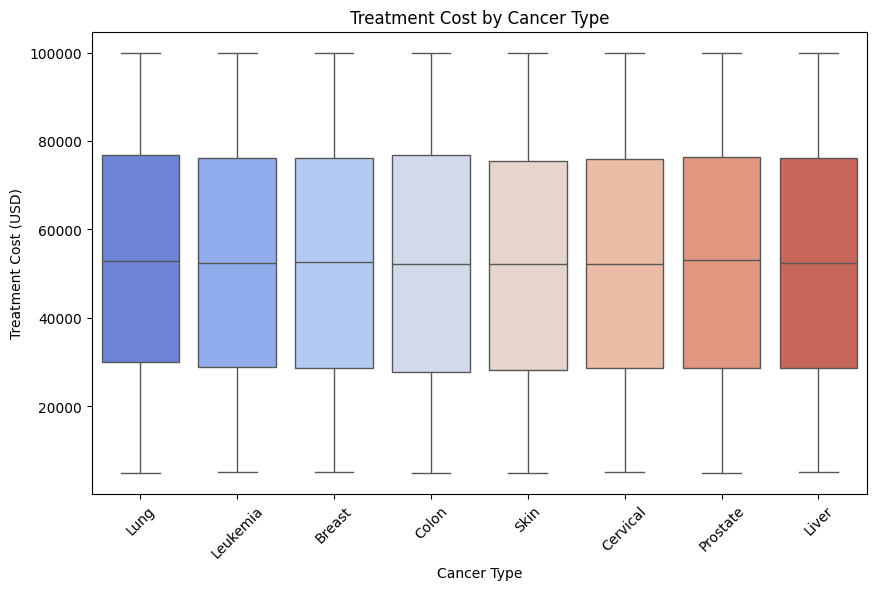

In [ ]:
# Boxplot for Treatment Cost by Cancer Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Type', y='Treatment_Cost_USD', data=df, palette='coolwarm')
plt.title('Treatment Cost by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Treatment Cost (USD)')
plt.xticks(rotation=45)
plt.show()


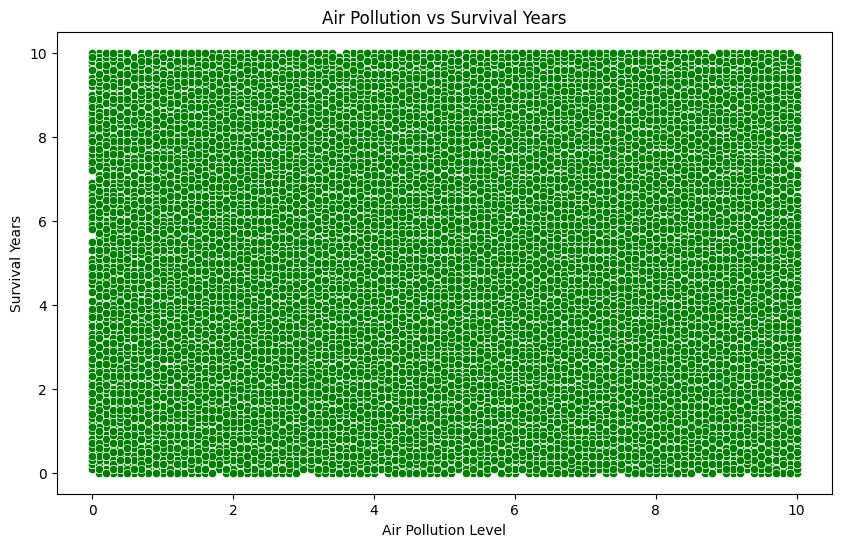

In [ ]:
# Scatter plot for Air Pollution vs Survival Years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Air_Pollution', y='Survival_Years', data=df, color='green')
plt.title('Air Pollution vs Survival Years')
plt.xlabel('Air Pollution Level')
plt.ylabel('Survival Years')
plt.show()


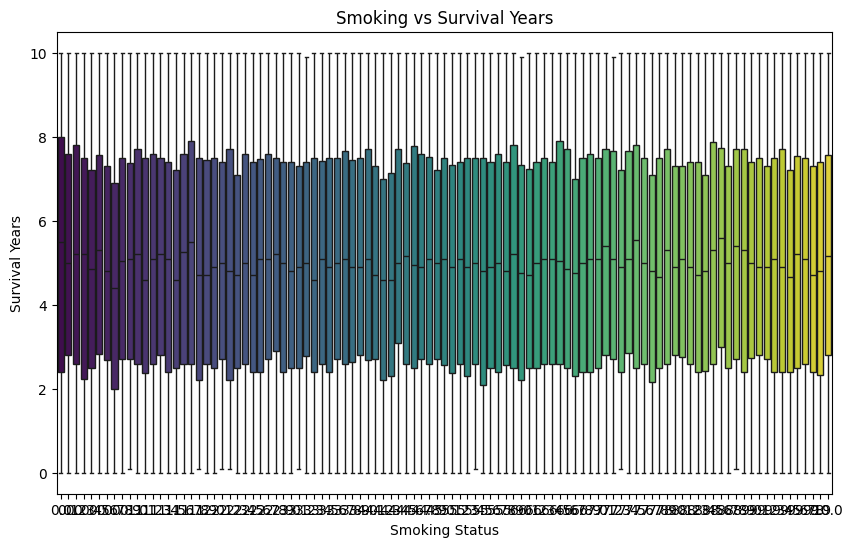

In [ ]:
# Boxplot for Smoking vs Survival Years
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking', y='Survival_Years', data=df, palette='viridis')
plt.title('Smoking vs Survival Years')
plt.xlabel('Smoking Status')
plt.ylabel('Survival Years')
plt.show()

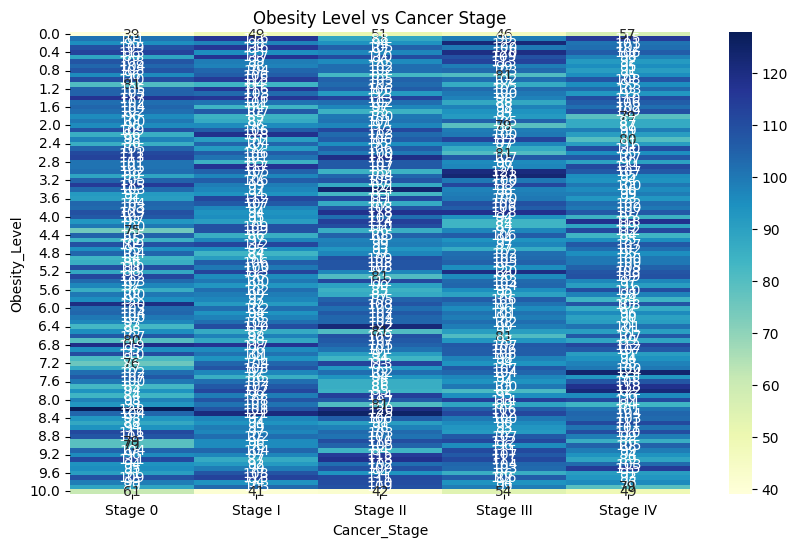

In [ ]:
# Heatmap for Obesity Level and Cancer Stage correlation
obesity_cancer_stage = df.groupby(['Obesity_Level', 'Cancer_Stage']).size().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(obesity_cancer_stage, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Obesity Level vs Cancer Stage')
plt.show()


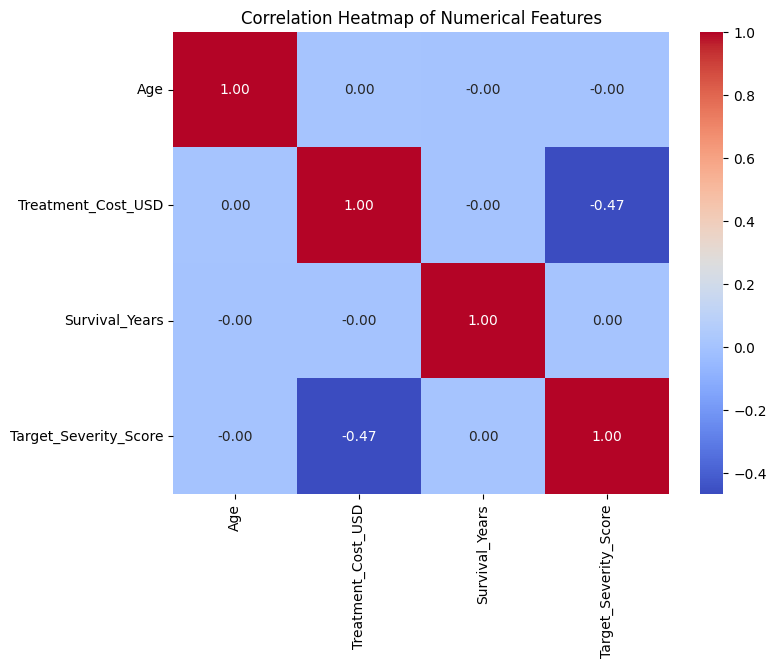

In [ ]:
# Correlation heatmap for numerical features
corr = df[['Age', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

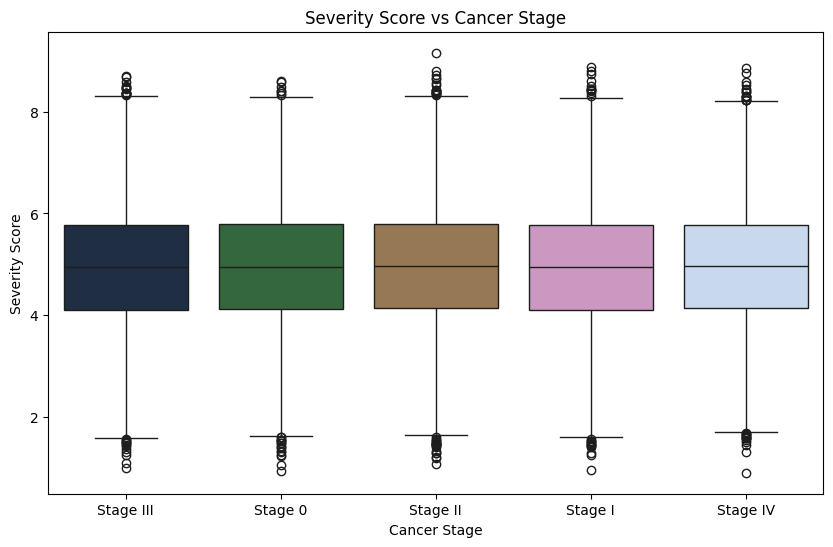

In [ ]:
# Boxplot for Severity Score vs Cancer Stage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Stage', y='Target_Severity_Score', data=df, palette='cubehelix')
plt.title('Severity Score vs Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Severity Score')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Define features and target
target = 'Target_Severity_Score'
features = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD']
categorical_features = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

# Bin continuous target into classes (e.g., 0: Low, 1: Medium, 2: High)
def bin_severity(score):
    if score <= 3:
        return 0  # Low
    elif score <= 6:
        return 1  # Medium
    else:
        return 2  # High

df['Severity_Class'] = df[target].apply(bin_severity)

# Update target to classification
target_class = 'Severity_Class'

# Split data
X = df[features + categorical_features]
y = df[target_class]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


----- RandomForest -----
Accuracy: 0.916
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.42      0.59       517
           1       0.90      1.00      0.95      7562
           2       0.99      0.73      0.84      1921

    accuracy                           0.92     10000
   macro avg       0.96      0.71      0.79     10000
weighted avg       0.92      0.92      0.91     10000


----- LogisticRegression -----
Accuracy: 0.897
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       517
           1       0.92      0.95      0.93      7562
           2       0.79      0.73      0.76      1921

    accuracy                           0.90     10000
   macro avg       0.87      0.83      0.85     10000
weighted avg       0.89      0.90      0.90     10000


----- XGBoost -----
Accuracy: 0.973
Classification Report:
               precision    recall  f1-s

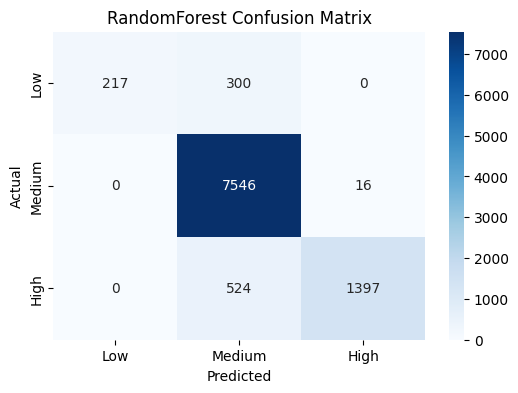

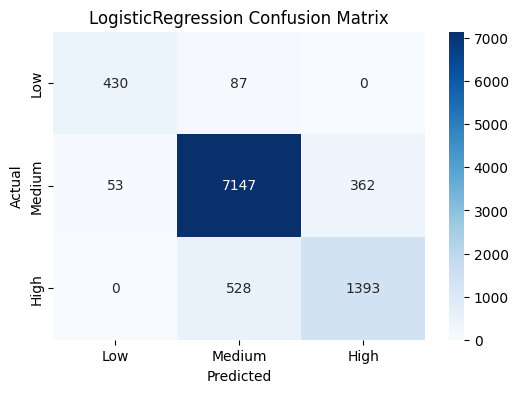

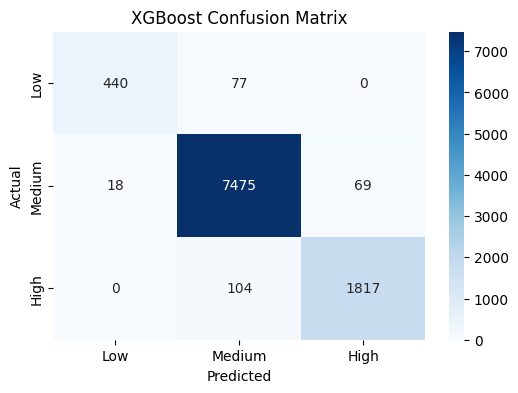

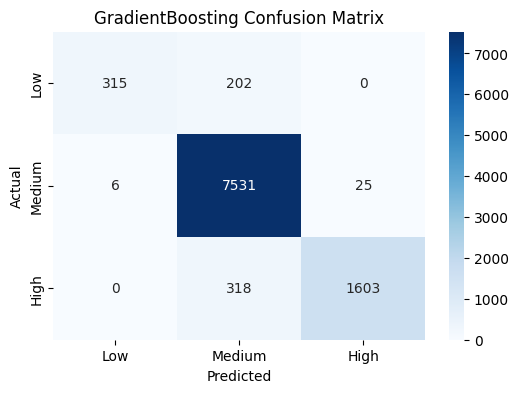

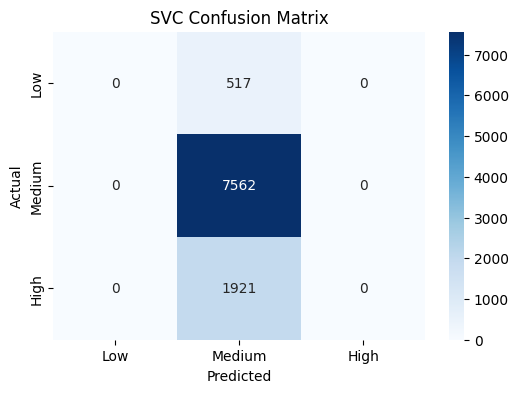

In [ ]:
# Define classifiers to test
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

# Loop through classifiers
for name, clf in classifiers.items():
    print(f"\n----- {name} -----")

    # Build pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {acc:.3f}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [ ]:
#Which Model do you believe is most appropraite
'''
Out of all the models that we tested I feel like  XGBoost is the most appropraite model. Becuase it has the highest accuracy percentage which is 97%. And the next best model is
GradientBoosting because it has the other highgest accuracy percentage which is 95%.
'''

'\nOut of all the models that we tested I feel like  XGBoost is the most appropraite model. Becuase it has the highest accuracy percentage which is 97%. And the next best model is \nGradientBoosting because it has the other highgest accuracy percentage which is 95%.\n'

In [ ]:
!jupyter nbconvert --to html Global_Cancer_Patients.ipynb

[NbConvertApp] Converting notebook Global_Cancer_Patients.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 3001713 bytes to Global_Cancer_Patients.html
